<a href="https://colab.research.google.com/github/fmargarit/CoderHouse_DataScience/blob/main/CoderHouse_DataScience_Entrega03_TP_FINAL_correccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODERHOUSE
### DATA SCIENCE I - Fundamentos (comision 60935)

*   Profesor:  Jorge RUIZ
*   Tutor:     Diego GASCH
*   Alumno:    Fernando MARGARIT

#--------------------------------------------------------------------------------------------------------------

# **RESUMEN DEL TRABAJO**

Este proyecto tiene como objetivo desarrollar un modelo predictivo que estime el precio de venta de automóviles usados en EEUU basándose en un conjunto de datos que incluye 10,000 registros. Cada registro contiene información detallada sobre el modelo del automóvil, el año de fabricación, la empresa fabricante del vehiculo, el kilometraje del mismo y el precio de venta publicado; entre otros.

La problemática abordada es la variabilidad en los precios de venta de los automóviles usados segun cada una de sus caracteristicas. Los factores que influyen en el precio pueden ser múltiples y complejos, lo que hace que la estimación precisa del valor de mercado sea un desafío significativo para vendedores y compradores por igual.

El alcance de este trabajo se centra en la construcción y validación de un modelo estadístico que pueda predecir con la mejor precisión posible los precios de venta utilizando técnicas de ciencia de datos. Se espera que este modelo sirva como una herramienta para aquellos interesados en obtener una estimación rápida y confiable del valor de mercado de un vehículo usado.


#--------------------------------------------------------------------------------------------------------------

# **OBJETIVOS / CONTEXTO / HIPOTESIS**

# *OBJETIVOS*

1. Generar distintos graficos que permitan visualmente detectar tendencias y outliers

2. Utilizar el dataset para Machine Learning y pronosticar el precio de venta de un vehiculo usado

3. Desarrollar un modelo de regresión que utilice variables como el modelo del automóvil, el año de fabricación, el fabricante y el kilometraje para predecir el precio de venta


# *HIPOTESIS*

1.   La mayor cantidad de vehiculos usados disponibles para la venta tienen una antiguedad mayor a 5 años

2.   Los vehiculos de la marca con mayor cantidad de vehiculos ofrecidos en el mercado tienen mas dias promedio en el mercado antes de venderse

3.   Los vehiculos de la marca con mayor cantidad de vehiculos ofrecidos en el mercado tienen la mayor dispersion de precios

4.   Las categorias con mayor cantidad de vehiculos ofrecidos en el mercado tienen la mayor dispersion de precios

5.   Vehiculos con motor a Gasolina son los mas ofrecidos

6.   Cuanto mayor es el kilometraje del vehiculo ofrecio, menor su precio

7.   Cuanto mas nuevo es el vehiculo usado, mayor es su precio

8.   Los vehiculos pueden permanecer mas de 100 dias en promedio en el mercado hasta venderse

# *CONTEXTO COMERCIAL*

El proyecto se sitúa en un contexto comercial donde la transparencia y la información precisa sobre los precios son esenciales para la toma de decisiones tanto por parte de vendedores como compradores. Un modelo predictivo confiable puede ser una herramienta clave para:

1. Ayudar a los vendedores a fijar precios competitivos y justos para sus vehículos.

2. Permitir a los compradores evaluar si están obteniendo un trato justo.

3. Facilitar a las aseguradoras la estimación del valor actual del vehículo para la elaboración de pólizas.


***Conclusiones al final***



1.   Grafico 1: conocer la cantidad de autos disponibles en el mercado por año de fabricacion y el precio promedio
2.   Grafico 2: distribucion de precios en cada categoria, vizualizando rangos y outliers
3.   Grafico 3: Volumen de vehiculos por las principales Marcas en el mercado de usados
4.   Grafico 4: distribucion de precios en cada marca, vizualizando rangos y outliers

#--------------------------------------------------------------------------------------------------------------











# ***DATASET:***  Vehiculos usados en EEUU disponibles para la venta.
## Campos del dataset:


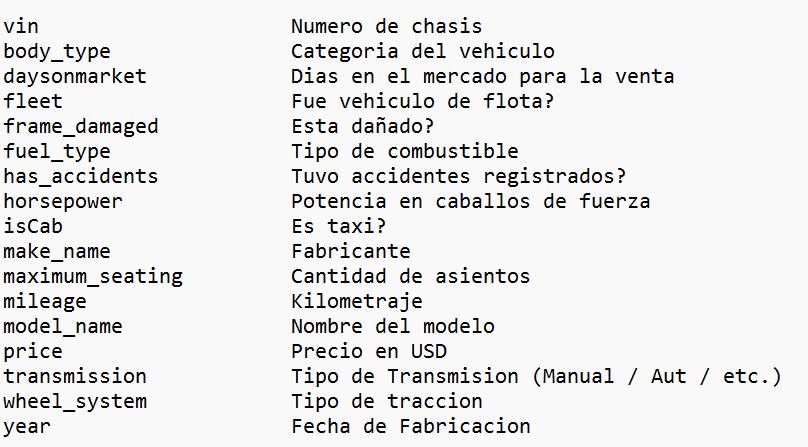

In [382]:
# Importar librerias
import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [383]:
# Importar archivo csv (guardado en GitHub)
from google.colab import drive
import os
git  = 'https://raw.githubusercontent.com/fmargarit/CoderHouse_DataScience/main/US%20USED%20CARS%20FOR%20SALES.csv'

df = pd.read_csv(git)


In [384]:
# conocer la cantidad de filas y columnas del DataFrame
df.shape

(10000, 17)

In [385]:
# cantidad de registros con campos NaN
df.isna().sum()

vin                   0
body_type            36
daysonmarket          0
fleet              3327
frame_damaged      3327
fuel_type           269
has_accidents      3327
horsepower          557
isCab              3327
make_name             0
maximum_seating     517
mileage             308
model_name            0
price                 0
transmission        163
wheel_system        465
year                  0
dtype: int64

In [386]:
# se considera que en los casos de fleet, frame_damaged, has_accidents y isCab el valor NaN corresponde a False

df['fleet'].fillna(False, inplace=True)
df['frame_damaged'].fillna(False, inplace=True)
df['has_accidents'].fillna(False, inplace=True)
df['isCab'].fillna(False, inplace=True)
df.isna().sum()


vin                  0
body_type           36
daysonmarket         0
fleet                0
frame_damaged        0
fuel_type          269
has_accidents        0
horsepower         557
isCab                0
make_name            0
maximum_seating    517
mileage            308
model_name           0
price                0
transmission       163
wheel_system       465
year                 0
dtype: int64

In [387]:
#Borrado de registros NaN

#df['body_type'].dropna(inplace=True)
df.dropna(inplace=True)




In [388]:
df.shape

(8891, 17)

In [389]:
df.isna().sum()

vin                0
body_type          0
daysonmarket       0
fleet              0
frame_damaged      0
fuel_type          0
has_accidents      0
horsepower         0
isCab              0
make_name          0
maximum_seating    0
mileage            0
model_name         0
price              0
transmission       0
wheel_system       0
year               0
dtype: int64

Text(0, 0.5, 'Precio Promedio')

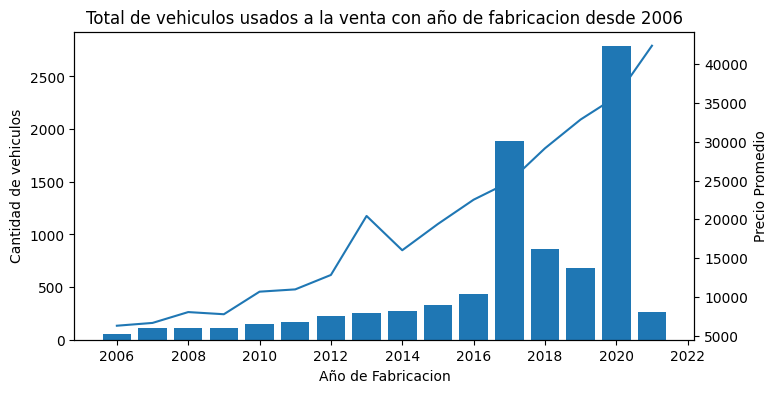

In [390]:
# GRAFICO 1
# Total de vehiculos usados a la venta segun su año de fabricacion incluyendo precio promedio
ventas = ventas = df[df['year'] > 2005].groupby('year').agg({'vin':'count', 'price':'mean'})
ventas.columns = ['Cantidad', 'Precio_Promedio']

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.bar(ventas.index, ventas['Cantidad'])
ax1.set_title('Total de vehiculos usados a la venta con año de fabricacion desde 2006')
ax1.set_ylabel('Cantidad de vehiculos')
ax1.set_xlabel('Año de Fabricacion')

ax2 = ax1.twinx()
ax2.plot(ventas.index, ventas['Precio_Promedio'])
ax2.set_ylabel('Precio Promedio')

Text(0.5, 1.0, 'Vehiculos por Fabricante disponibles en el mercado para la venta')

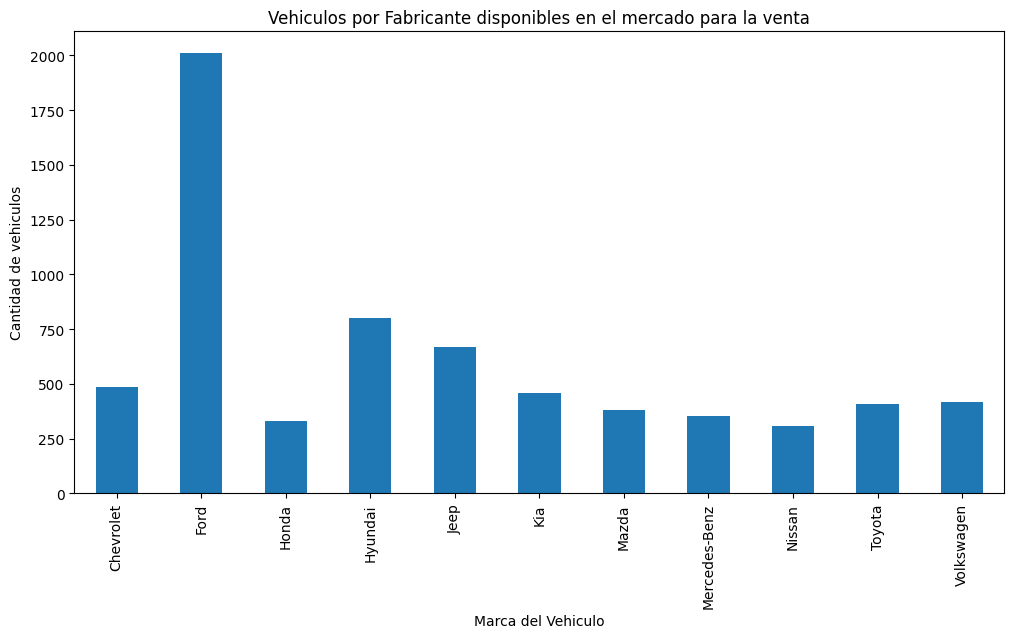

In [391]:
# GRAFICO 2
# Total de vehiculos usados a la venta segun categoria
cant = df.groupby(['make_name']).agg({'vin':'count'})
cant = cant[cant['vin'] > 300]

cant['vin'].plot(kind='bar', figsize=(12,6))
plt.xlabel('Marca del Vehiculo')
plt.ylabel('Cantidad de vehiculos')
plt.title('Vehiculos por Fabricante disponibles en el mercado para la venta')

Text(0.5, 1.0, 'Dias promedio en el mercado por Marca')

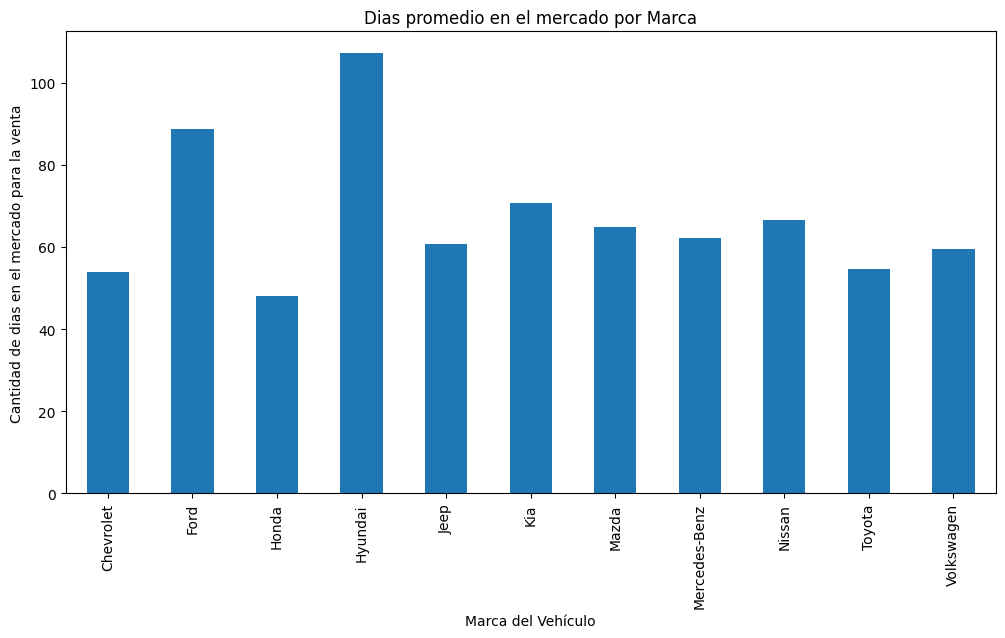

In [392]:
# GRAFICO 3
# Dias promedio en el mercado para venta por Marca
dias = df.groupby(['make_name']).agg({'vin':'count','daysonmarket':'mean'})
dias = dias[dias['vin'] > 300]


dias['daysonmarket'].plot(kind='bar', figsize=(12,6))
plt.xlabel('Marca del Vehículo')
plt.ylabel('Cantidad de dias en el mercado para la venta')
plt.title('Dias promedio en el mercado por Marca')

Text(0.5, 0, 'Categoria del Vehiculo')

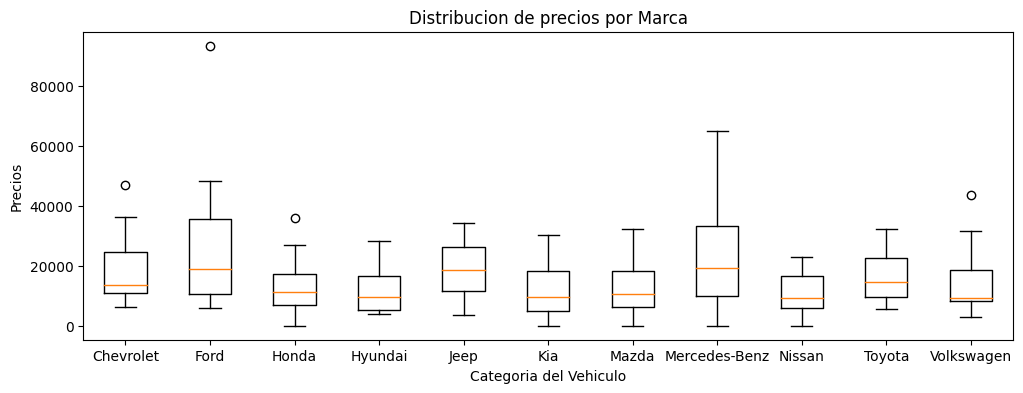

In [393]:
# GRAFICO 4
# Precios por marca de vehiculo

# Agrupar por Marca y cantidad
vta_x_marca = df.groupby('make_name')['vin'].count()

# Filtrar las marcas que tienen más de 300 vehiculos en venta
vta_flitro = vta_x_marca[vta_x_marca > 300].index

# Filtrar el DataFrame original para incluir solo las marcas filtradas
df_vta = df[df['make_name'].isin(vta_flitro)]

# Crear la tabla dinámica
marca = df_vta[df_vta['year'] > 2005].pivot_table(values='price', index='year', columns='make_name', aggfunc='mean')

# Poner en cero los NaN
marca.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(12,4))
ax.boxplot(marca , labels=vta_flitro)
ax.set_title('Distribucion de precios por Marca')
ax.set_ylabel('Precios')
ax.set_xlabel('Categoria del Vehiculo')

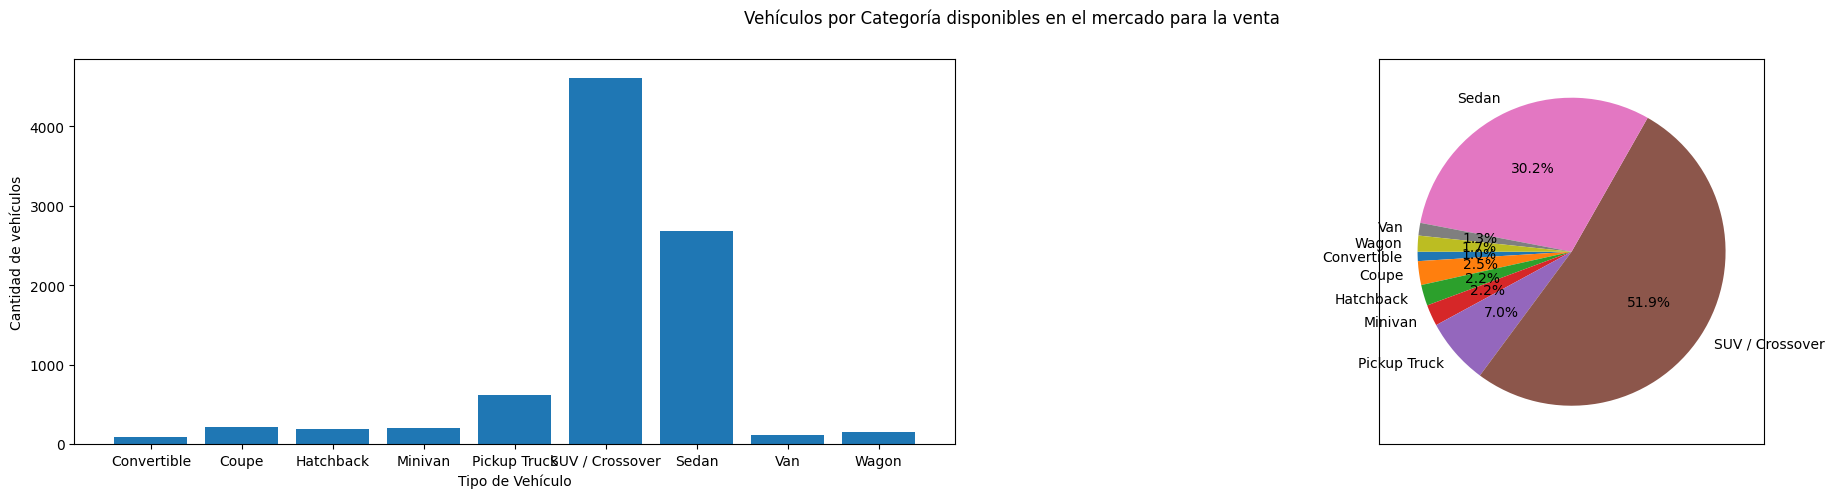

In [394]:
# GRAFICO 5
# Total de vehiculos usados a la venta segun categoria
fig, axs = plt.subplots(nrows=1, ncols=2)

cantidad = df.groupby(['body_type']).agg({'vin':'count'})

axs[0].bar(cantidad.index, cantidad['vin'])
axs[0].figure.set_size_inches(40, 5)
axs[0].set_xlabel('Tipo de Vehículo')
axs[0].set_ylabel('Cantidad de vehículos')

axs[1].pie(cantidad['vin'], labels=cantidad.index, autopct='%1.1f%%', startangle=180, )
axs[1].set_frame_on(True)
axs[1].figure.set_size_inches(25, 5)

fig.suptitle("Vehículos por Categoría disponibles en el mercado para la venta")
plt.show()

Text(0.5, 0, 'Categoria del Vehiculo')

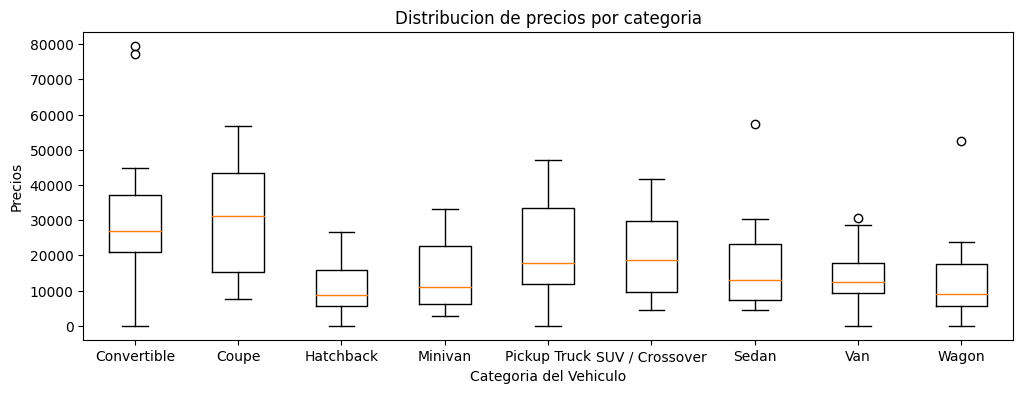

In [395]:
# GRAFICO 6
# Precios por categoria de vehiculo
categoria = df[df['year'] > 2005].pivot_table(values='price', index='year', columns='body_type', aggfunc='mean')
categoria.fillna(0, inplace=True)


fig, ax = plt.subplots(figsize=(12,4))
ax.boxplot(categoria, labels=categoria.columns)
ax.set_title('Distribucion de precios por categoria')
ax.set_ylabel('Precios')
ax.set_xlabel('Categoria del Vehiculo')

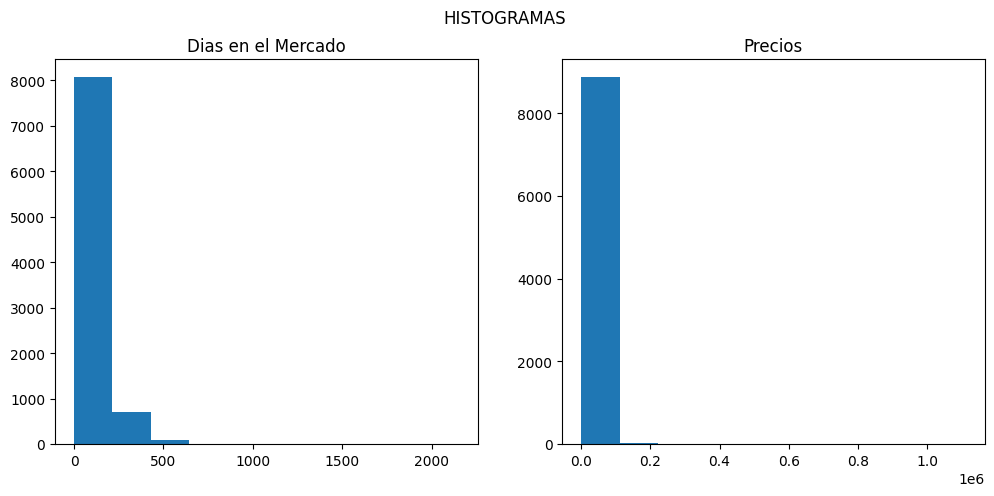

In [396]:
# GRAFICO 7
# Histogramas

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axs[0].hist(data=df, x='daysonmarket',  bins=10)
axs[0].set_title("Dias en el Mercado")

axs[1].hist(data=df, x='price', bins=10)
axs[1].set_title("Precios")

fig.suptitle("HISTOGRAMAS")
plt.show()

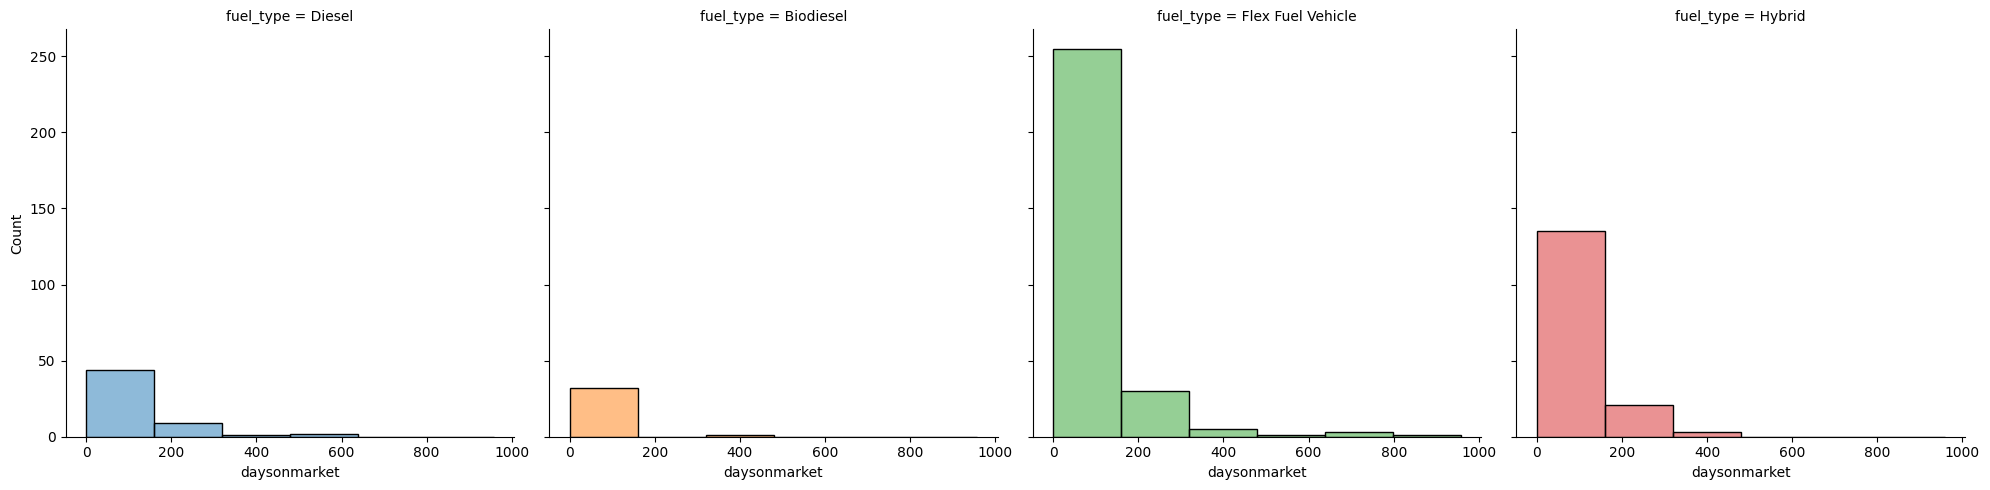

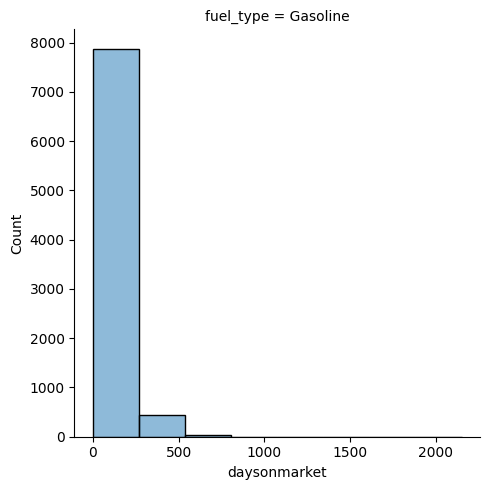

In [397]:
# GRAFICO 8
#Histogramas por tipo de Combustible
df_sin_nafta = df[df['fuel_type'] != 'Gasoline']
df_nafta = df[df['fuel_type'] == 'Gasoline']

sns.displot(data=df_sin_nafta, x='daysonmarket', hue='fuel_type', col='fuel_type', legend=False, bins=6)
sns.displot(data=df_nafta, x='daysonmarket', hue='fuel_type', col='fuel_type', legend=False, bins=8)

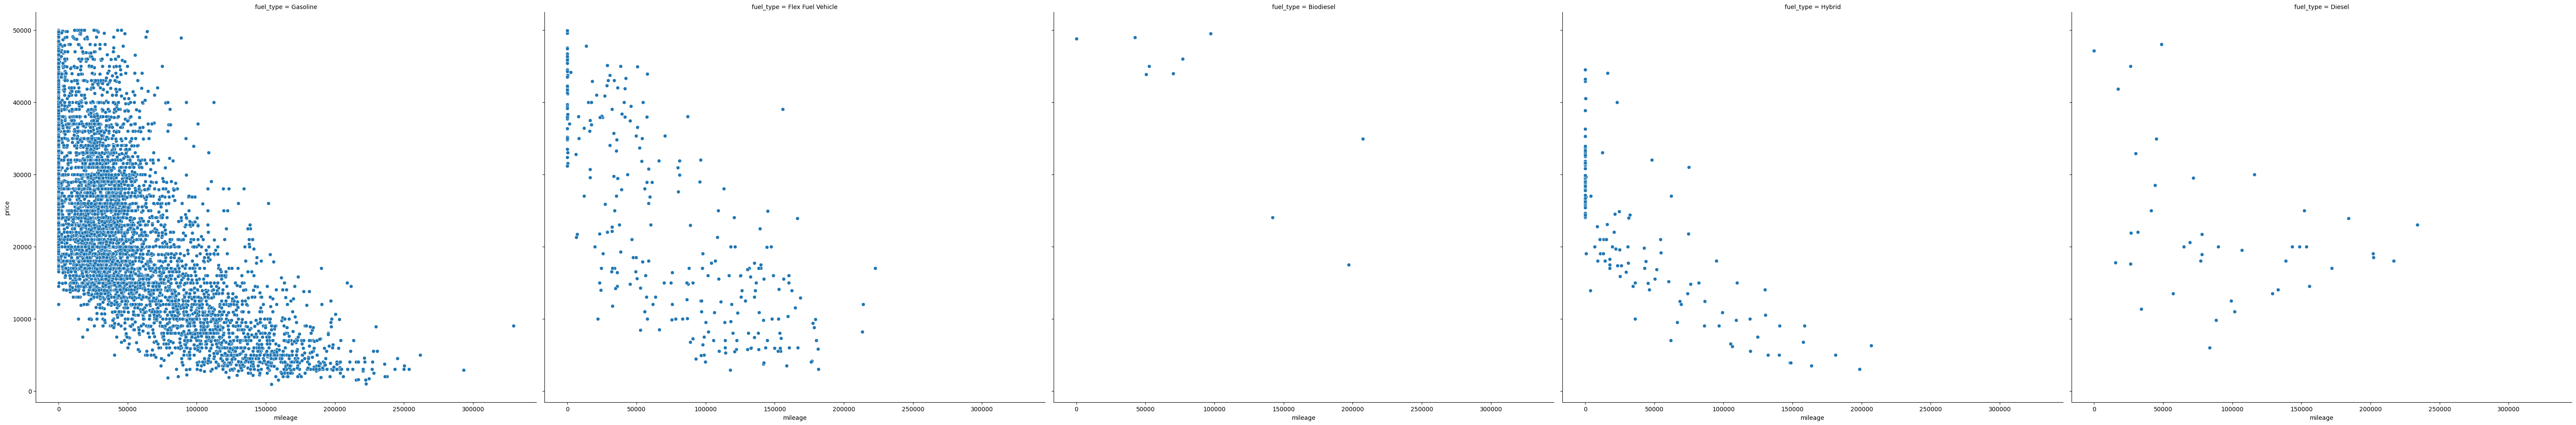

In [398]:
# GRAFICO 9
#SCATTERPLOT por tipo de Combustible - relacion Precio/Kilometraje

dfp = df[df['price'] < 50000]

g = sns.FacetGrid(dfp, col='fuel_type', height=10, aspect=1.2)
g.map(sns.scatterplot, 'mileage', 'price')
plt.show()

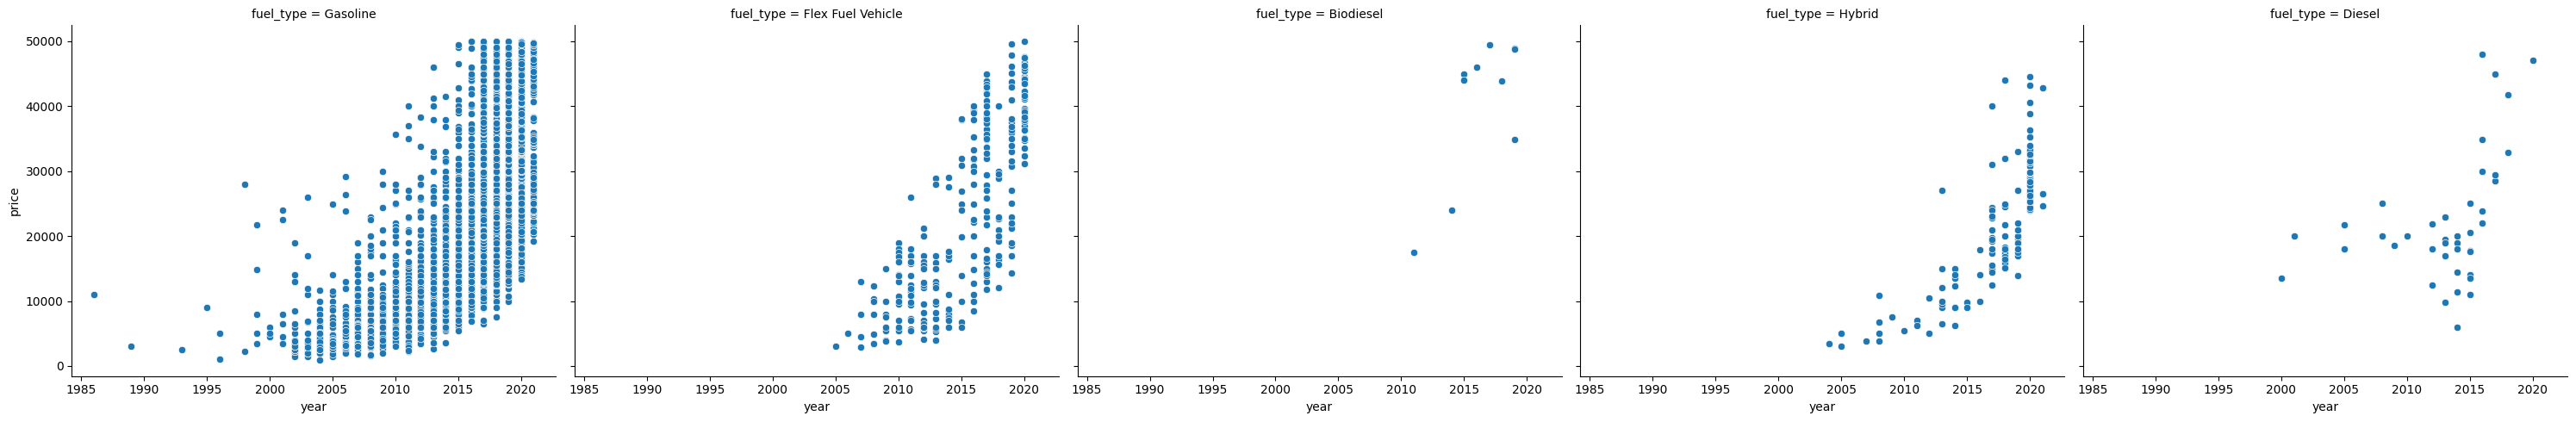

In [399]:
# GRAFICO 10
#SCATTERPLOT por tipo de Combustible - relacion Precio/Fecha Fabricacion

dfp = df[df['price'] < 50000]

g = sns.FacetGrid(dfp, col='fuel_type', height=5, aspect=1.2)
g.map(sns.scatterplot, 'year', 'price')
plt.show()

# **CONCLUSIONES**

1.   La mayor cantidad de vehiculos usados disponibles para la venta tienen una antiguedad mayor a 5 años
***FALSO - la mayor cantidad de vehiculos ofrecidos es posterior a 2017 (Grafico 1)***

2.   Los vehiculos de la marca con mayor cantidad de vehiculos ofrecidos en el mercado tienen mas dias promedio en el mercado antes de venderse
***FALSO - Ford es la marca con mas vehiculos disponibles a la venta pero los vehiculos Hyundai esta mas tiempo para venderse(Grafico 2 y 3)***

3.   Los vehiculos de la marca con mayor cantidad de vehiculos ofrecidos en el mercado tienen la mayor dispersion de precios
***FALSO - Ford es la marca con mas vehiculos disponibles a la venta pero los vehiculos de Mercedes-Benz tienen los precios de venta mas dispersos (Grafico 2 y 4)***

4.   Las categorias con mayor cantidad de vehiculos ofrecidos en el mercado tienen la mayor dispersion de precios
***FALSO - La categoria SUV-Crossover es la mas vendida con 52% del mercado pero no es la que tiene mas dispersion de precios. Convertibles y Coupes, con volumenes inferiores, tienen mas amplitud en sus precios (Grafico 5 y 6)***

5.   Vehiculos con motor a Gasolina son los mas ofrecidos
***VERDADERO (Grafico 8)***

6.   Cuanto mayor es el kilometraje del vehiculo ofrecio, menor su precio
***VERDADERO (Grafico 9)***

7.   Cuanto mas nuevo es el vehiculo ofrecio, mayor su precio
***VERDADERO (Grafico 10)***

8.   Los vehiculos pueden permanecer mas de 100 dias en promedio en el mercado hasta venderse
***VERDADERO (Grafico 8)***








# FIN - Entrega I

------------------------------------------------------------------------------------------
# **ENTREGA FINAL**

# **OBJETIVO**:
Utilizar el modelo de regresion lineal para calcular el valor de mi vehiculo (target) FORD SUV con 17553km y fabricado en el año 2018

In [400]:
# Cargar nuevamente el DATASET (guardado en GitHub)
from google.colab import drive
import os
git  = 'https://raw.githubusercontent.com/fmargarit/CoderHouse_DataScience/main/US%20USED%20CARS%20FOR%20SALES.csv'

df = pd.read_csv(git)

In [401]:
df.shape

(10000, 17)

In [402]:
df.describe().round(2)

,daysonmarket,horsepower,mileage,price,year
count,10000.00,9443.00,9692.00,10000.00,10000.00
mean,74.39,245.10,38300.75,27809.32,2017.04
std,104.92,85.19,47698.71,23715.45,3.93
min,0.00,78.00,0.00,899.00,1978.00
25%,15.00,180.00,10.00,16900.00,2016.00
50%,37.00,241.00,23263.50,25495.00,2018.00
75%,76.00,295.00,53860.25,34522.50,2020.00
max,2150.00,797.00,340003.00,1110499.00,2021.00


In [403]:
df

,vin,body_type,daysonmarket,fleet,frame_damaged,fuel_type,has_accidents,horsepower,isCab,make_name,maximum_seating,mileage,model_name,price,transmission,wheel_system,year
0,ZACNJABB5KPJ92081,SUV / Crossover,522,NaN,NaN,Gasoline,NaN,177.0,NaN,Jeep,5 seats,7.0,Renegade,23141,A,FWD,2019
1,SALCJ2FX1LH858117,SUV / Crossover,207,NaN,NaN,Gasoline,NaN,246.0,NaN,Land Rover,7 seats,8.0,Discovery Sport,46500,A,AWD,2020
2,JF1VA2M67G9829723,Sedan,1233,False,False,Gasoline,False,305.0,False,Subaru,5 seats,NaN,WRX STI,46995,M,AWD,2016
3,SALRR2RV0L2433391,SUV / Crossover,196,NaN,NaN,Gasoline,NaN,340.0,NaN,Land Rover,7 seats,11.0,Discovery,67430,A,AWD,2020
4,SALCJ2FXXLH862327,SUV / Crossover,137,NaN,NaN,Gasoline,NaN,246.0,NaN,Land Rover,7 seats,7.0,Discovery Sport,48880,A,AWD,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3VWJX7AT6CM607391,Hatchback,21,False,False,Gasoline,True,170.0,False,Volkswagen,4 seats,124118.0,Beetle,5900,A,FWD,2012
9996,YV4102RL2M1685225,SUV / Crossover,41,NaN,NaN,Gasoline,NaN,250.0,NaN,Volvo,5 seats,0.0,XC60,55310,A,AWD,2021
9997,1FMSK8DH9LGC58378,SUV / Crossover,54,NaN,NaN,Gasoline,NaN,300.0,NaN,Ford,7 seats,20.0,Explorer,40596,A,AWD,2020
9998,1FMSK8DH5LGC55364,SUV / Crossover,21,False,False,Gasoline,False,300.0,False,Ford,7 seats,10.0,Explorer,41380,A,AWD,2020


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vin              10000 non-null  object 
 1   body_type        9964 non-null   object 
 2   daysonmarket     10000 non-null  int64  
 3   fleet            6673 non-null   object 
 4   frame_damaged    6673 non-null   object 
 5   fuel_type        9731 non-null   object 
 6   has_accidents    6673 non-null   object 
 7   horsepower       9443 non-null   float64
 8   isCab            6673 non-null   object 
 9   make_name        10000 non-null  object 
 10  maximum_seating  9483 non-null   object 
 11  mileage          9692 non-null   float64
 12  model_name       10000 non-null  object 
 13  price            10000 non-null  int64  
 14  transmission     9837 non-null   object 
 15  wheel_system     9535 non-null   object 
 16  year             10000 non-null  int64  
dtypes: float64(2)

In [405]:
#seleccionar los datos necesarios para la regresion
df = df[ ['make_name', 'body_type', 'mileage', 'year', 'price'] ]

In [406]:
#renombrar nombre de las columnas
df = df.rename(columns = {'make_name':'Fabricante','body_type':'Modelo','mileage':'Kilometraje','year':'Año','price':'Precio'})

In [407]:
#convertir campos en Category
df['Modelo'] = df['Modelo'].astype('category')
df['Año'] = df['Año'].astype('category')
df['Fabricante'] = df['Fabricante'].astype('category')

In [408]:
cardinalidad =  pd.DataFrame(df.nunique()).T
cardinalidad

,Fabricante,Modelo,Kilometraje,Año,Precio
0,46,9,6365,32,4731


In [409]:
#datos en blanco
df.isna().sum()

Fabricante       0
Modelo          36
Kilometraje    308
Año              0
Precio           0
dtype: int64

In [410]:
#reemplazar los valores nan de Kilometraje con el promedio considerando año de fabricacion y modelo
promedio_kilometraje = df.groupby(['Año', 'Modelo'])['Kilometraje'].transform('mean')
df['Kilometraje'].fillna(promedio_kilometraje, inplace=True)

In [411]:
#comprobar el reemplazo de datos en blanco
df.isna().sum()


Fabricante      0
Modelo         36
Kilometraje     0
Año             0
Precio          0
dtype: int64

In [412]:
#datos en blanco
df[df.isna().any(axis=1)]

,Fabricante,Modelo,Kilometraje,Año,Precio
851,Kia,NaN,20.0,2021,25610
857,Kia,NaN,16.0,2021,25610
865,Kia,NaN,18.0,2021,25610
896,Kia,NaN,12.0,2021,26055
1079,Kia,NaN,2.0,2021,28110
4440,Mitsubishi,NaN,1.0,2019,23254
4593,Mitsubishi,NaN,11.0,2020,34607
4626,Hyundai,NaN,5.0,2021,42728
5228,Hyundai,NaN,0.0,2021,39445
5524,Volkswagen,NaN,0.0,2021,46305


In [413]:
#reemplazar los valores nan de Modelo con el modelo que mas se repite de cada fabricante de ese año de fabricacion
modelo_moda = df.groupby(['Año', 'Fabricante'])['Modelo'].transform(lambda x: x.mode()[0])

df['Modelo'].fillna(modelo_moda, inplace=True)


In [414]:
#comprobar el reemplazo de datos en blanco
df.isna().sum()

Fabricante     0
Modelo         0
Kilometraje    0
Año            0
Precio         0
dtype: int64

In [415]:
#filtrar por el fabricante seleccionado

#df_modelo = df[ (df['body_type'] == 'SUV / Crossover') & (df['price'] <= 100000) & (df['make_name']== 'Ford')]
df_modelo = df[ (df['Modelo'] == 'SUV / Crossover') & (df['Fabricante']== 'Ford')]
#df_modelo = df[ (df['Fabricante']== 'Ford')]

In [416]:
df_modelo

,Fabricante,Modelo,Kilometraje,Año,Precio
105,Ford,SUV / Crossover,53326.0,2016,25000
220,Ford,SUV / Crossover,81916.0,2015,20999
221,Ford,SUV / Crossover,87440.0,2015,17995
230,Ford,SUV / Crossover,62256.0,2014,21495
251,Ford,SUV / Crossover,74046.0,2013,25495
...,...,...,...,...,...
9978,Ford,SUV / Crossover,12.0,2020,30091
9980,Ford,SUV / Crossover,77222.0,2016,12995
9984,Ford,SUV / Crossover,12.0,2020,30091
9997,Ford,SUV / Crossover,20.0,2020,40596


In [417]:
df_modelo.describe().round(2)

,Kilometraje,Precio
count,975.00,975.00
mean,24534.73,36586.67
std,40275.57,57608.07
min,0.00,1999.00
25%,0.00,21992.50
50%,20.00,28309.00
75%,35917.50,39283.50
max,243327.00,1110499.00


Text(0.5, 0, 'Año del Vehiculo')

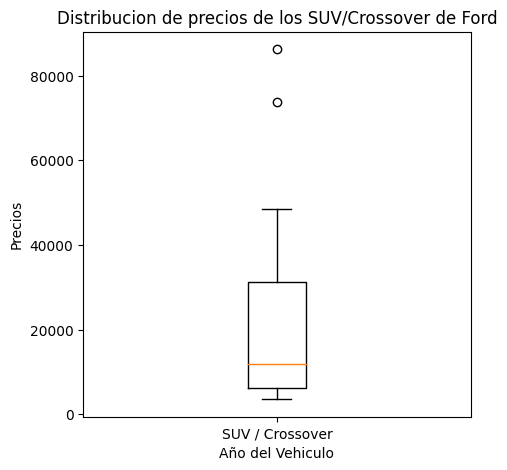

In [418]:
# IDENTIFICACION GRAFICA DE OUTLIERS
categ = df_modelo.pivot_table(values='Precio', index='Año', columns='Modelo', aggfunc='mean')
categ.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(5,5))
ax.boxplot(categ, labels=categ.columns)
ax.set_title('Distribucion de precios de los SUV/Crossover de Ford')
ax.set_ylabel('Precios')
ax.set_xlabel('Año del Vehiculo')

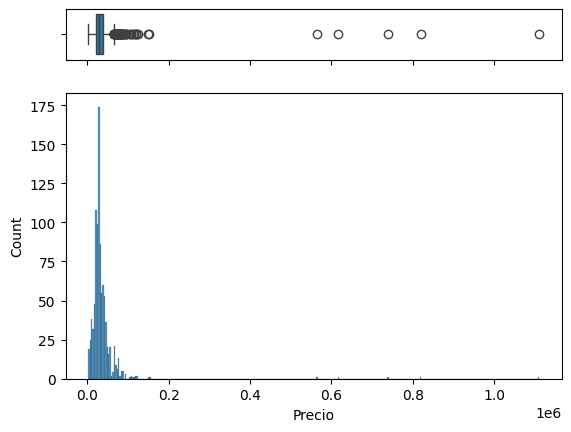

In [419]:
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_modelo['Precio'], ax=ax_box, orient='h')
sns.histplot(df_modelo['Precio'], ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

In [420]:
# Z-SCORE
z_score = (df_modelo['Precio'] - df_modelo['Precio'].mean()) / df_modelo['Precio'].std()
df_modelo['z_score'] = z_score
df_modelo['outliers'] = 0
df_modelo.loc[(df_modelo['z_score'] > 3) | (df_modelo['z_score'] < -3), 'outliers'] = 1


df_modelo[df_modelo['outliers'] == 1]


,Fabricante,Modelo,Kilometraje,Año,Precio,z_score,outliers
396,Ford,SUV / Crossover,87399.0,2013,616895,10.073387,1
2526,Ford,SUV / Crossover,111823.0,2013,1110499,18.641701,1
3157,Ford,SUV / Crossover,17792.0,2018,739400,12.199912,1
6738,Ford,SUV / Crossover,0.0,2021,820395,13.605878,1
9439,Ford,SUV / Crossover,4822.0,2019,563995,9.155113,1


In [421]:
#reemplazar valores outliers por el precio promedio de vehiculos del mismo año (excluyendo outliers) -- vehiculos Ford no pueden tener esos precios. Error en el dataset
promedio_precio = df_modelo[df_modelo['outliers'] != 1].groupby('Año')['Precio'].mean()

df_modelo.loc[df_modelo['outliers'] == 1, 'Precio'] = df_modelo['Año'].map(promedio_precio)

#muestra como quedaron actualizados los precios de los outliers
df_modelo[df_modelo['outliers'] == 1]

,Fabricante,Modelo,Kilometraje,Año,Precio,z_score,outliers
396,Ford,SUV / Crossover,87399.0,2013,12197.714286,10.073387,1
2526,Ford,SUV / Crossover,111823.0,2013,12197.714286,18.641701,1
3157,Ford,SUV / Crossover,17792.0,2018,27637.196970,12.199912,1
6738,Ford,SUV / Crossover,0.0,2021,65041.941176,13.605878,1
9439,Ford,SUV / Crossover,4822.0,2019,38879.830189,9.155113,1


In [422]:
df_modelo

,Fabricante,Modelo,Kilometraje,Año,Precio,z_score,outliers
105,Ford,SUV / Crossover,53326.0,2016,25000.0,-0.201129,0
220,Ford,SUV / Crossover,81916.0,2015,20999.0,-0.270581,0
221,Ford,SUV / Crossover,87440.0,2015,17995.0,-0.322727,0
230,Ford,SUV / Crossover,62256.0,2014,21495.0,-0.261971,0
251,Ford,SUV / Crossover,74046.0,2013,25495.0,-0.192537,0
...,...,...,...,...,...,...,...
9978,Ford,SUV / Crossover,12.0,2020,30091.0,-0.112756,0
9980,Ford,SUV / Crossover,77222.0,2016,12995.0,-0.409520,0
9984,Ford,SUV / Crossover,12.0,2020,30091.0,-0.112756,0
9997,Ford,SUV / Crossover,20.0,2020,40596.0,0.069597,0


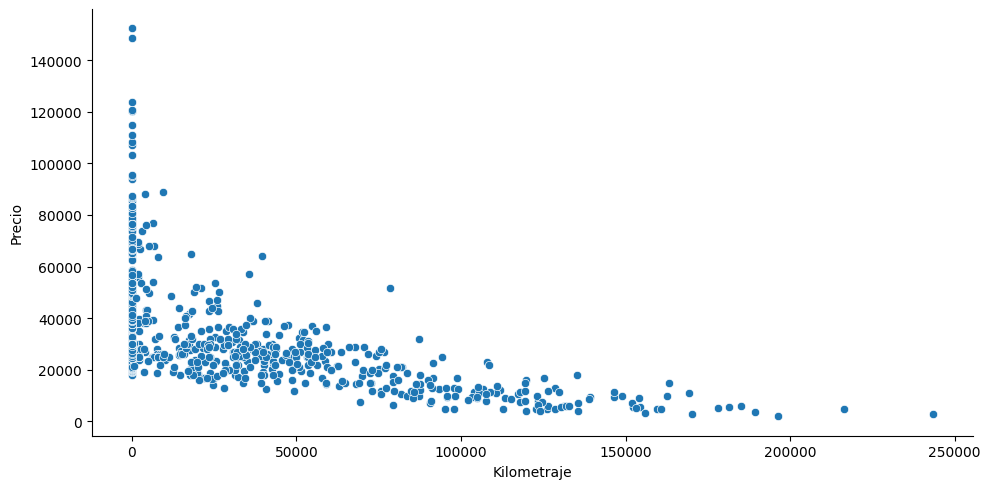

In [423]:
g = sns.FacetGrid(df_modelo,  height=5, aspect=2)
g.map(sns.scatterplot, 'Kilometraje', 'Precio')
plt.show()

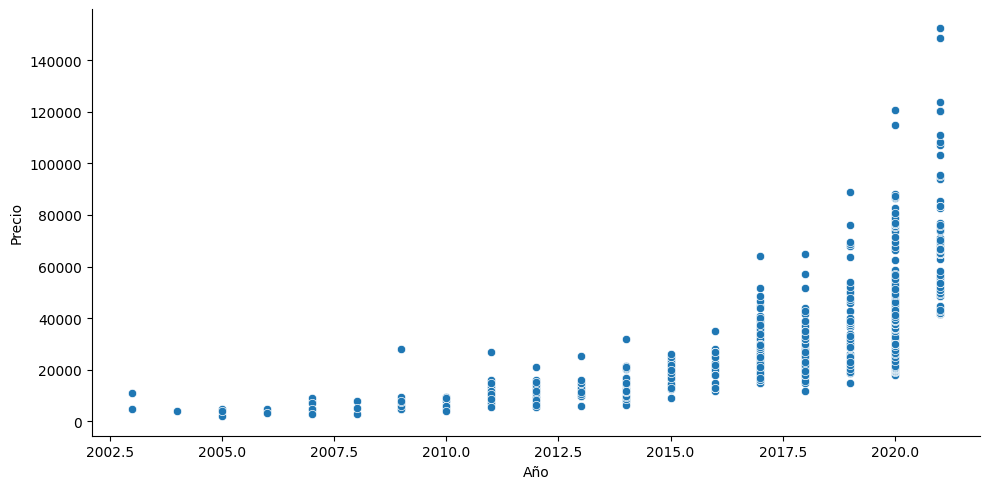

In [424]:
g = sns.FacetGrid(df_modelo, height=5, aspect=2)
g.map(sns.scatterplot, 'Año', 'Precio')
plt.show()

In [425]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 105 to 9998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Fabricante   975 non-null    category
 1   Modelo       975 non-null    category
 2   Kilometraje  975 non-null    float64 
 3   Año          975 non-null    category
 4   Precio       975 non-null    float64 
 5   z_score      975 non-null    float64 
 6   outliers     975 non-null    int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 76.3 KB


In [426]:
df_modelo.describe(include = 'category')

,Fabricante,Modelo,Año
count,975,975,975
unique,1,1,19
top,Ford,SUV / Crossover,2020
freq,975,975,479


In [427]:
# Correlaciones
corr_km_precio = df_modelo['Kilometraje'].corr(df_modelo['Precio'], method='pearson')
corr_anio_precio = df_modelo['Año'].corr(df_modelo['Precio'], method='pearson')

print('La correlacion entre el kilometraje y el precio es:', corr_km_precio )
print('La correlacion entre el año de fabricacion y el precio es:', corr_anio_precio )

La correlacion entre el kilometraje y el precio es: -0.5110845109094743
La correlacion entre el año de fabricacion y el precio es: 0.5495469573786952


In [428]:
# variables independientes
x1 = df_modelo[['Año']]
x2 = df_modelo[['Kilometraje']]

# variable dependiente
y = df_modelo[['Precio']]

x1_train, x1_Test, y_train, y_Test, = train_test_split(x1, y, test_size = 0.2 , random_state = 0)

x2_train, x2_Test, y_train, y_Test, = train_test_split(x2, y, test_size = 0.2 , random_state = 0)

In [429]:
regressor1 = LinearRegression()
regressor1.fit(x1_train, y_train)


LinearRegression()

In [430]:
regressor2 = LinearRegression()
regressor2.fit(x2_train, y_train)

LinearRegression()

In [431]:
# pendiente
pend1 = regressor1.coef_
pend2 = regressor2.coef_

# interseccion
interc1 = regressor1.intercept_
interc2 = regressor2.intercept_

# relacion Año / Precio
print(f"El valor de la pendiente para la relacion Año-Precio es {pend1.round(13)} y de la interseccion es {interc1.round(3)}")

# relacion Kilometraje / Precio
print(f"El valor de la pendiente para la relacion Kilometraje-Precio es {pend2.round(13)} y de la interseccion es {interc2.round(3)}")

El valor de la pendiente para la relacion Año-Precio es [[3313.78428182]] y de la interseccion es [-6655316.624]
El valor de la pendiente para la relacion Kilometraje-Precio es [[-0.23601799]] y de la interseccion es [38506.121]


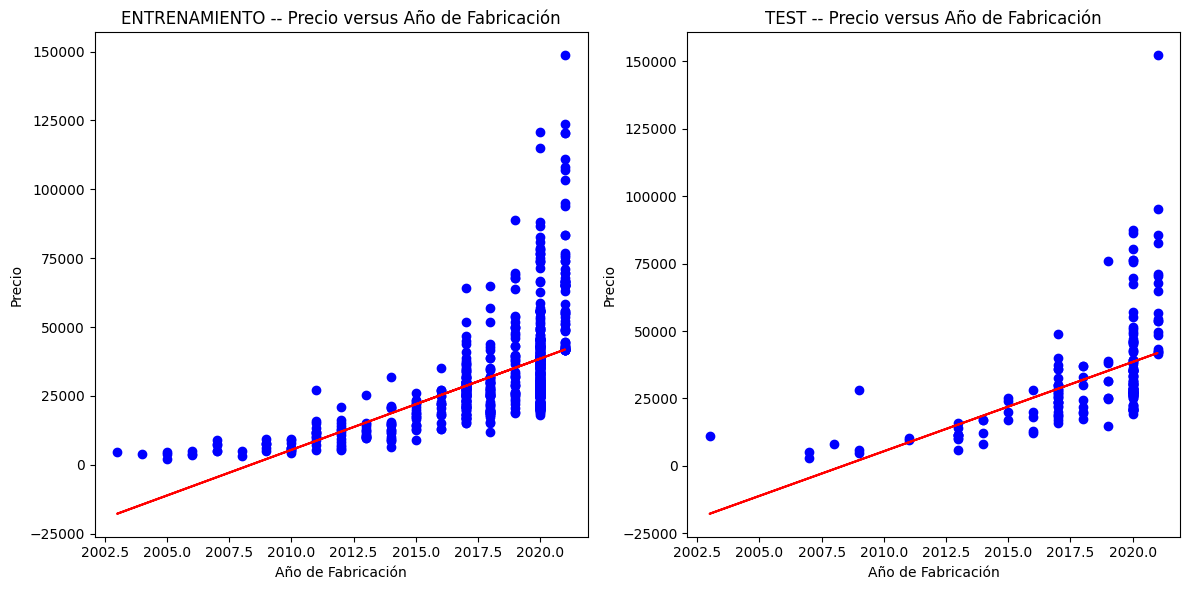

In [432]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# gráfico (entregamiento)
axs[0].scatter(x1_train, y_train, color='blue')
axs[0].plot(x1_train, regressor1.predict(x1_train), color='red')
axs[0].set_title('ENTRENAMIENTO -- Precio versus Año de Fabricación')
axs[0].set_ylabel('Precio')
axs[0].set_xlabel('Año de Fabricación')

# gráfico (test)
axs[1].scatter(x1_Test, y_Test, color='blue')
axs[1].plot(x1_Test, regressor1.predict(x1_Test), color='red')
axs[1].set_title('TEST -- Precio versus Año de Fabricación')
axs[1].set_ylabel('Precio')
axs[1].set_xlabel('Año de Fabricación')

plt.tight_layout()
plt.show()


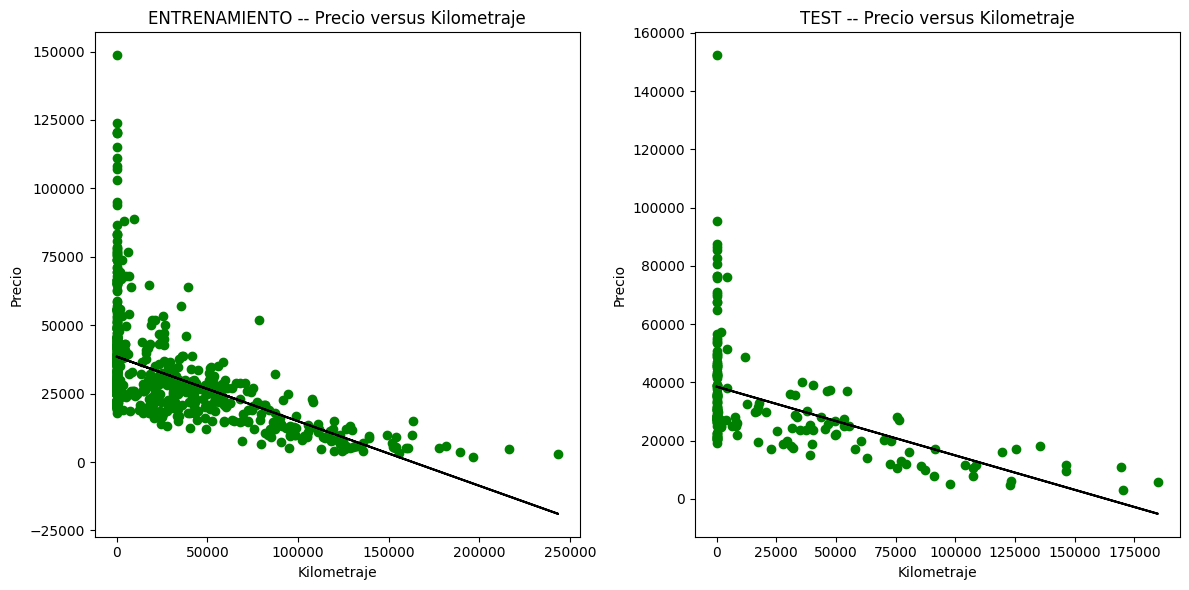

In [433]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# gráfico (entregamiento)
axs[0].scatter(x2_train, y_train, color='green')
axs[0].plot(x2_train, regressor2.predict(x2_train), color='black')
axs[0].set_title('ENTRENAMIENTO -- Precio versus Kilometraje')
axs[0].set_ylabel('Precio')
axs[0].set_xlabel('Kilometraje')

# gráfico (test)
axs[1].scatter(x2_Test, y_Test, color='green')
axs[1].plot(x2_Test, regressor2.predict(x2_Test), color='black')
axs[1].set_title('TEST -- Precio versus Kilometraje')
axs[1].set_ylabel('Precio')
axs[1].set_xlabel('Kilometraje')

plt.tight_layout()
plt.show()

In [434]:
y_pred = regressor1.predict(x1_Test)
y_pred

array([[ 38527.62508806],
       [ 28586.27224261],
       [ 38527.62508806],
       [ 35213.84080624],
       [ 38527.62508806],
       [ 38527.62508806],
       [ 38527.62508806],
       [ 38527.62508806],
       [ 38527.62508806],
       [ 38527.62508806],
       [ -4551.57057555],
       [ 38527.62508806],
       [ 18644.91939716],
       [ 41841.40936987],
       [ 38527.62508806],
       [ 38527.62508806],
       [ 35213.84080624],
       [ 38527.62508806],
       [ 38527.62508806],
       [ 41841.40936987],
       [ 21958.70367898],
       [ 38527.62508806],
       [ 38527.62508806],
       [ 28586.27224261],
       [ 38527.62508806],
       [  8703.56655171],
       [ 21958.70367898],
       [ 35213.84080624],
       [ 31900.05652443],
       [ 28586.27224261],
       [ 31900.05652443],
       [ 28586.27224261],
       [ 38527.62508806],
       [ 15331.13511535],
       [ 28586.27224261],
       [ 41841.40936987],
       [ 38527.62508806],
       [ 25272.48796079],
       [  20

In [435]:
y_Test

,Precio
8575,27440.0
3647,48800.0
8299,45445.0
6019,31335.0
7286,45760.0
...,...
8989,27440.0
8847,35546.0
8730,42770.0
7044,29980.0


In [436]:
# R2 o coef de determinacion
coef1 = regressor1.score(x1_train, y_train)
coef2 = regressor2.score(x2_train, y_train)

coef3 = regressor1.score(x1_Test, y_Test)
coef4 = regressor2.score(x2_Test, y_Test)

In [437]:
coef1, coef2, coef3, coef4

(0.30682458102306676, 0.262142273894473, 0.283654242559896, 0.2570265144771545)

In [438]:
# Input para calcular precio con kilometraje y año de fabricacion
fab = int(input('Ingrese año de fabricacion de su vehiculo: '))
km  = int(input('Ingrese kilometraje de su vehiculo: '))

# Prediccion
precio_predict1 = int(  regressor1.predict([[fab]])  )
precio_predict2 = int(  regressor2.predict([[km]])   )

print(f'Su auto fabricado en {fab} tendria un precio de {precio_predict1}')
print(f'Su auto con {km} kilometros tendria un precio de {precio_predict2}')

Ingrese año de fabricacion de su vehiculo: 2018
Ingrese kilometraje de su vehiculo: 17553
Su auto fabricado en 2018 tendria un precio de 31900
Su auto con 17553 kilometros tendria un precio de 34363


# **CONCLUSIONES**

Si bien el modelo da como resultado que mi vehiculo FORD SUV con 17.553 y fabricado en 2018 entria un valor de entre $31.900 - $34.363, los valores pueden no ser muy representativos ya que los indices de correlacion y el R2 tienen valores bajos.


**-- Correlación entre el Kilometraje y el Precio:**

   La correlación entre el kilometraje y el precio es de aproximadamente -0.63. Esto sugiere una relación inversa entre el kilometraje y el precio. En otras palabras, a medida que el kilometraje aumenta, es probable que el precio disminuya.


**-- Correlación entre el Año de Fabricación y el Precio:**

   La correlación entre el año de fabricación y el precio es de aproximadamente 0.64. Esto indica una relación positiva entre el año de fabricación y el precio. En general, los vehículos más nuevos tienden a tener precios más altos.


**-- R2 o Coeficiente de Determinacion**

   Los valores de R cuadrado son bajos (entre 0.34 y 0.43). Hay una cantidad significativa de variabilidad en el precio que no se explica por las características incluidas en el modelo, Km y año de fabricacion.
